**Import Libraries**

In [ ]:
# Pandas and Visualization
%matplotlib inline
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import warnings
# Sklearn
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

**Load Train and Test Datasets**


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/csse445/Titanic dataset/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/csse445/Titanic dataset/test.csv")


print("The shape of the training dataset is {}.\n".format(train_data.shape))
print("The shape of the testing dataset is {}.\n".format(test_data.shape))

The shape of the training dataset is (891, 12).

The shape of the testing dataset is (418, 11).



In [ ]:
warnings.filterwarnings("ignore")

**EDA**

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Drop PassengerId column

In [ ]:
train_data.drop(columns='PassengerId', axis=1, inplace=True)

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
round((train_data.isnull().sum() / len(train_data)) * 100, 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

Text(0.5, 1.0, 'Missing values ')

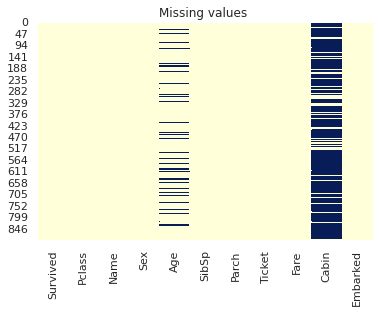

In [ ]:
sns.heatmap(train_data.isnull(), cbar = False,cmap="YlGnBu").set_title("Missing values ")

In [ ]:
train_data.fillna(train_data.mean(), inplace=True)
# count the number of NaN values in each column
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# Select numerical columns
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]
num_cols.remove('Pclass')

cat_cols = list(set(train_data.columns) - set(num_cols) - {'Ticket', 'Name', 'Cabin'})
num_cols.remove('Survived')

print("Numerical Columns:", num_cols, '', sep='\n')
print("Categorical Columns:", cat_cols, '', sep='\n')

Numerical Columns:
['Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns:
['Embarked', 'Sex', 'Pclass']



In [ ]:
train_data['Survived'].value_counts()

1    134
0     68
Name: Survived, dtype: int64

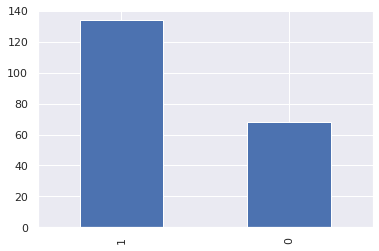

In [ ]:
train_data['Survived'].value_counts().plot(kind='bar')

In [ ]:
train_data['Sex'].value_counts()

male      107
female     95
Name: Sex, dtype: int64

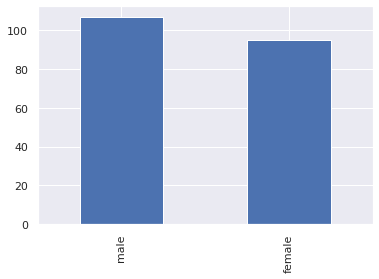

In [ ]:
train_data['Sex'].value_counts().plot(kind='bar')

In [ ]:
train_data['Embarked'].value_counts()

S    129
C     69
Q      4
Name: Embarked, dtype: int64

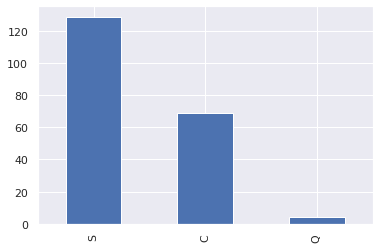

In [ ]:
train_data['Embarked'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb33bd757d0>,
      dtype=object)

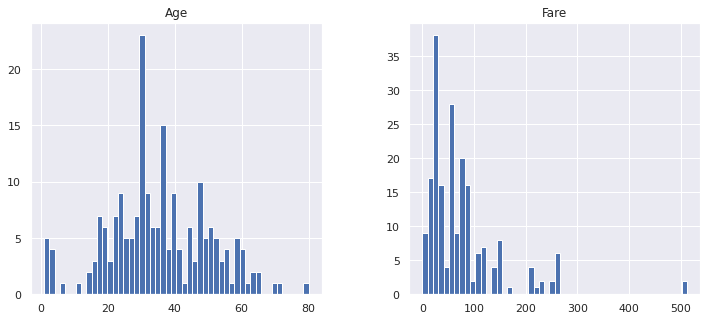

In [ ]:
train_data[['Age', 'Fare']].hist(bins=50, figsize=(12,5))

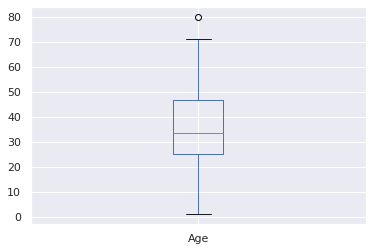

In [ ]:
train_data['Age'].plot(kind='box')

**More EDA**

Linear Correlation



In [ ]:
corr_matrix = train_data.corr()

In [ ]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
SibSp       0.138202
Fare        0.128261
Parch       0.042456
Pclass     -0.030513
Age        -0.231887
Name: Survived, dtype: float64

Percentage of survived Women

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.9368421052631579


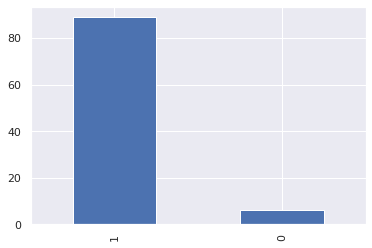

In [ ]:
train_data.loc[train_data.Sex == 'female']["Survived"].value_counts().plot(kind='bar')

Percentage of survived Men

In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.4205607476635514


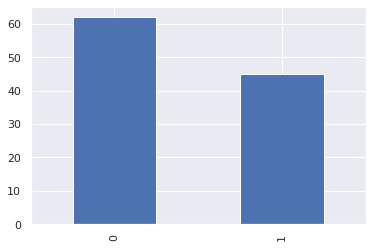

In [ ]:
train_data.loc[train_data.Sex == 'male']["Survived"].value_counts().plot(kind='bar')

**Feature Engineering**

In [ ]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [ ]:
class AddColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        # print(X.shape)
        AgeBucket = X[:, Age_index] // 15 * 15
        FamilySize = X[:, SibSp_index] + X[:, Parch_index]
        FarePerPerson = X[:, Fare_index] / (FamilySize + 1)
        
        return np.c_[AgeBucket, FamilySize, FarePerPerson]

In [ ]:
# num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
Age_index, SibSp_index, Parch_index, Fare_index = 0, 1, 2, 3 

In [ ]:
num_pipeline = Pipeline([('num_imputer', SimpleImputer(strategy="median")),
                         ('add_cols', AddColumns()),
                         ('std_scaler', StandardScaler())])

cat_pipeline = Pipeline([('cat_imputer', MostFrequentImputer()),
                         ('one_hot', OneHotEncoder())])

In [ ]:
preprocessor_pipeline = ColumnTransformer([("num_transformer", num_pipeline, num_cols),
                                         ("cat_transformer", cat_pipeline, cat_cols)])

# Model Selection

SVM Classifier

In [ ]:
X_train = preprocessor_pipeline.fit_transform(train_data)

In [ ]:
y_train = train_data["Survived"]

In [ ]:
svm_clf = SVC(gamma="scale")

In [ ]:
full_pipeline =  Pipeline([('preprocessor', preprocessor_pipeline),
                           ('model', svm_clf)])

In [ ]:
svm_scores = cross_val_score(full_pipeline, train_data, y_train, cv=10)
print('SVC score:', svm_scores.mean())

SVC score: 0.7526190476190475


RandomForest Classifier

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
full_pipeline = Pipeline([('preprocessor', preprocessor_pipeline),
                           ('model', forest_clf)])

In [ ]:
forest_scores = cross_val_score(full_pipeline, train_data, y_train, cv=10)
print('RandomForest score:', forest_scores.mean())

RandomForest score: 0.7123809523809526
